In [11]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df=pd.read_csv('data.csv')

In [13]:
df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [14]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [15]:
df.duplicated().sum()

np.int64(0)

In [16]:
#segregate numerical and categorical columns
categorical_columns=df.columns[df.dtypes=='O']
numerical_columns=df.columns[df.dtypes!='O']

In [17]:
categorical_columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course'],
      dtype='object')

In [18]:
numerical_columns

Index(['math_score', 'reading_score', 'writing_score'], dtype='object')

/n


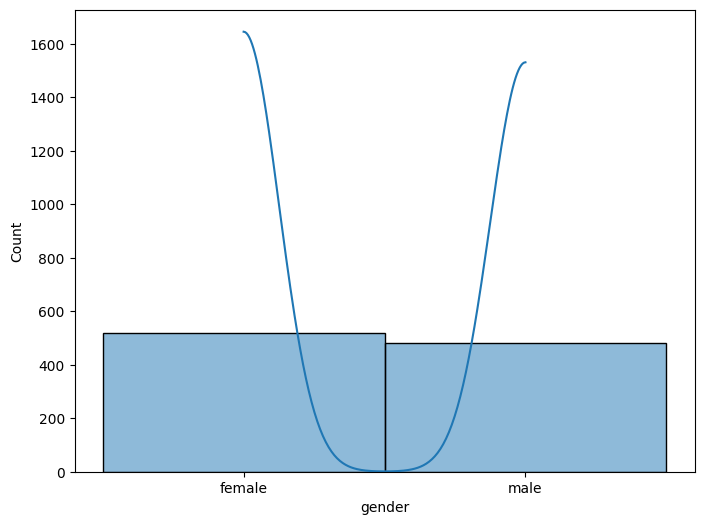

/n


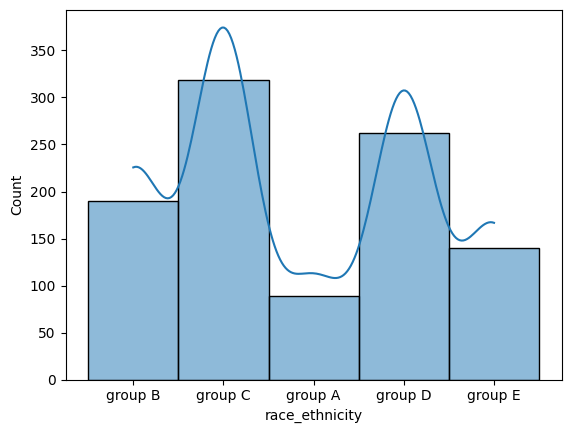

/n


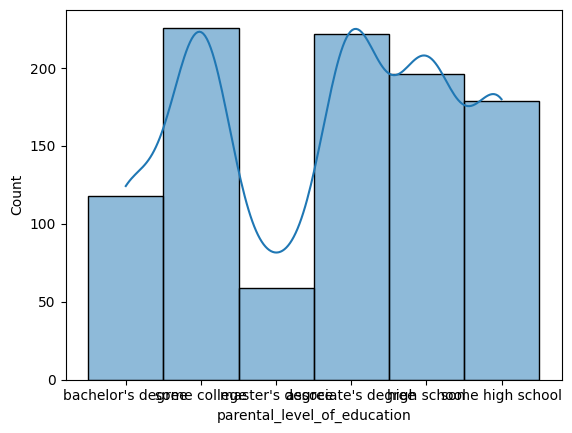

/n


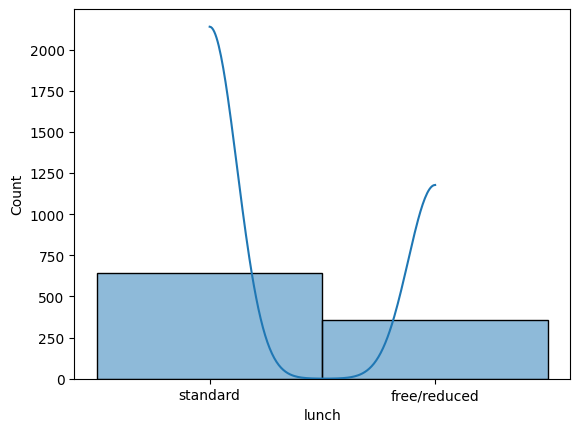

/n


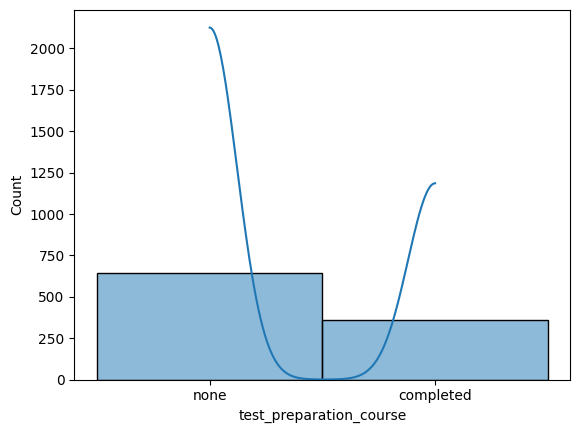

In [19]:
plt.figure(figsize=(8,6))
x=0
for i in categorical_columns:
    sns.histplot(data=df,x=i,kde=True)
    print('/n')
    plt.show()

/n


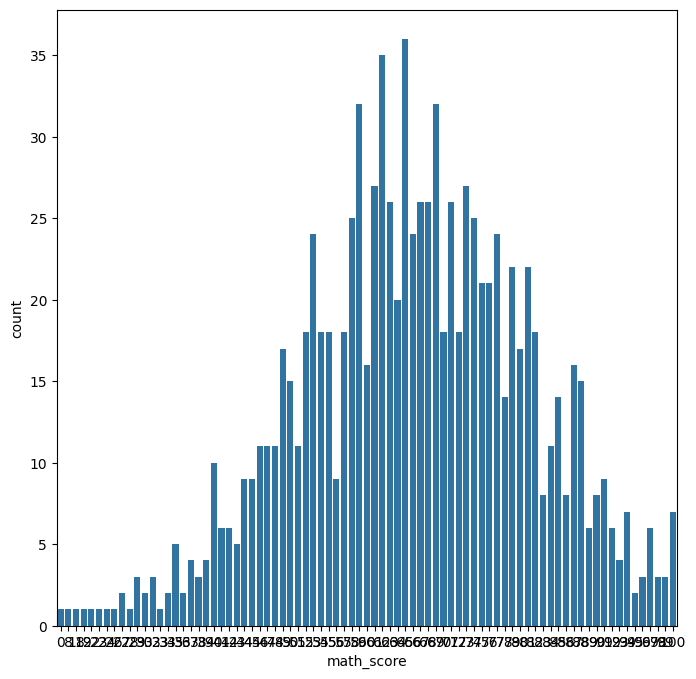

/n


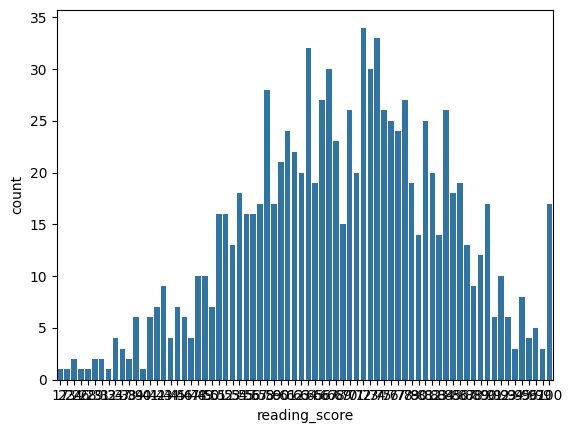

/n


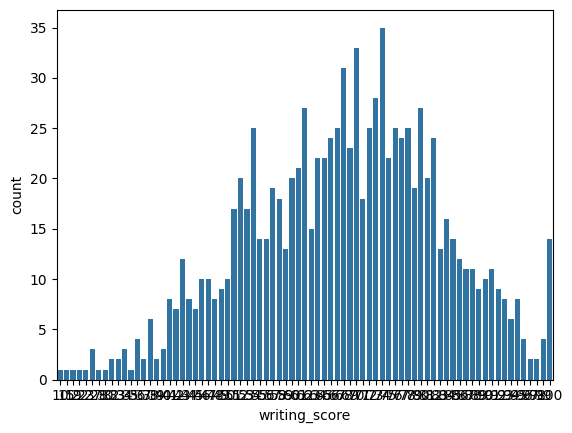

In [21]:
plt.figure(figsize=(8,8))
x=0
for i in numerical_columns:
    sns.countplot(data=df,x=i)
    print('/n')
    plt.show()

In [22]:
df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


maths score by Gender
gender
male      68.728216
female    63.633205
Name: math_score, dtype: float64


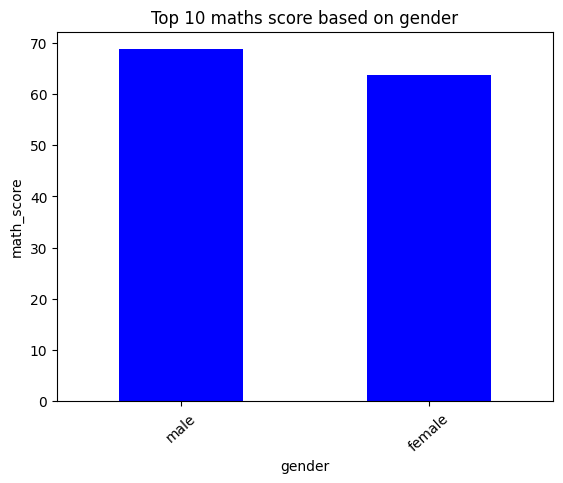

In [23]:
maths_score_gender=df.groupby('gender')['math_score'].mean().sort_index(ascending=False)
print('maths score by Gender')
print(maths_score_gender)

maths_score_gender.head().plot(kind='bar',color='blue')
plt.title('Top 10 maths score based on gender')
plt.xlabel('gender')
plt.ylabel('math_score')
plt.xticks(rotation=42)
plt.show()

writing score by Gender
gender
male      63.311203
female    72.467181
Name: writing_score, dtype: float64


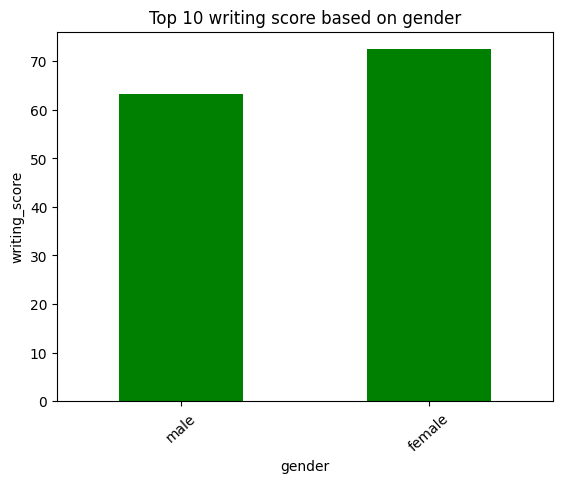

In [25]:
writing_score_gender=df.groupby('gender')['writing_score'].mean().sort_index(ascending=False)
print('writing score by Gender')
print(writing_score_gender)

writing_score_gender.head().plot(kind='bar',color='green')
plt.title('Top 10 writing score based on gender')
plt.xlabel('gender')
plt.ylabel('writing_score')
plt.xticks(rotation=42)
plt.show()

reading score by Gender
gender
male      65.473029
female    72.608108
Name: reading_score, dtype: float64


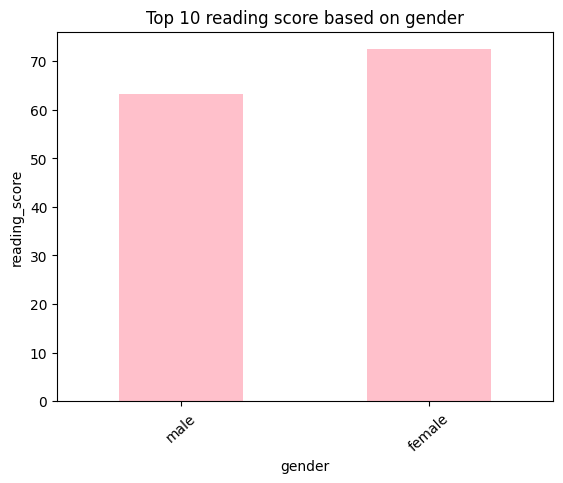

In [27]:
reading_score_gender=df.groupby('gender')['reading_score'].mean().sort_index(ascending=False)
print('reading score by Gender')
print(reading_score_gender)

writing_score_gender.head().plot(kind='bar',color='pink')
plt.title('Top 10 reading score based on gender')
plt.xlabel('gender')
plt.ylabel('reading_score')
plt.xticks(rotation=42)
plt.show()

In [28]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


Total score and average

In [29]:
df['Total_Score']=df['math_score']+df['reading_score']+df['writing_score']
df['Average_score']=df['Total_Score']/3

In [30]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_Score,Average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


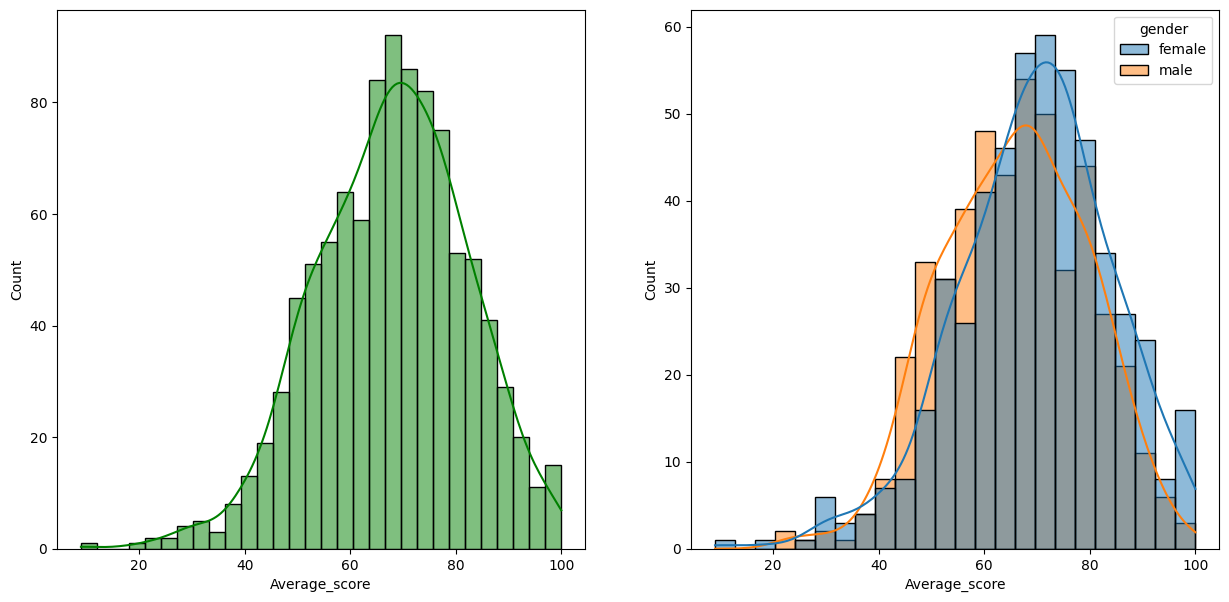

In [31]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='Average_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Average_score',kde=True,hue='gender')
plt.show()